# Task 4.9 Part 2

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import ords_prods_customers_merge.pkl from PKL file

path = r'C:\Users\natha\OneDrive\Desktop\Data Analytics\Jupyter\09-2023 Instacart Basket Analysis'
ords_prods_customers_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_merge.pkl'))

In [3]:
# Checking dataframe

ords_prods_customers_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependents,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


## 3. *We need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.*
### *In a markdown cell beneath your histogram, describe what the histogram demonstrates.*

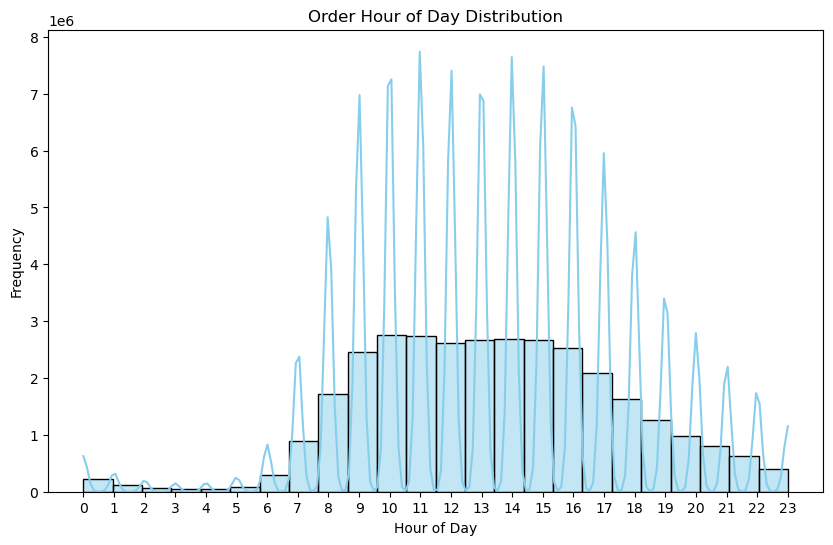

In [4]:
# Create a histogram of the 'order_hour_of_day' column
plt.figure(figsize=(10, 6))
sns.histplot(ords_prods_customers_merge['order_hour_of_day'], bins=24, kde=True, color='skyblue')
plt.title('Order Hour of Day Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(24))  # Set x-axis ticks to display each hour

# Save figure to path
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_distribution.png'))

# Display the figure
plt.show()

### *The histogram demonstrates that most orders occur between the hours of 7 AM and 10 PM. This is usually the normal time that most people are awake. Less orders occur during sleeping hours. Orders are highest and peak before, during and after lunch hours.*

# 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

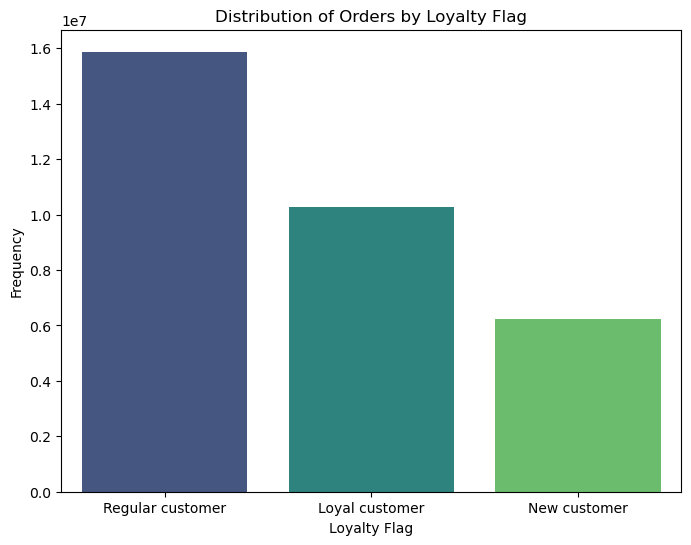

In [5]:
# Count the frequency of each loyalty flag
loyalty_counts = ords_prods_customers_merge['loyalty_flag'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=loyalty_counts.index, y=loyalty_counts.values, palette='viridis')
plt.title('Distribution of Orders by Loyalty Flag')
plt.xlabel('Loyalty Flag')
plt.ylabel('Frequency')

# Save figure to path
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_distribution.png'))

# Display the figure
plt.show()

### *Regular customers make up ~ 50% of orders, suggesting a consistent flow of business from this segment.*

### *Loyal customers make up ~ 30% of orders, contributing a significant portion of business.*

### *New customers make up ~ 20% of orders, representing the smallest portion of business as they may have joined the platform recently and not have made multiple orders.*

# 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

### Creating Line Charts
#### *We need to sample the data, the full data set is likely too large for computing when creating line charts*

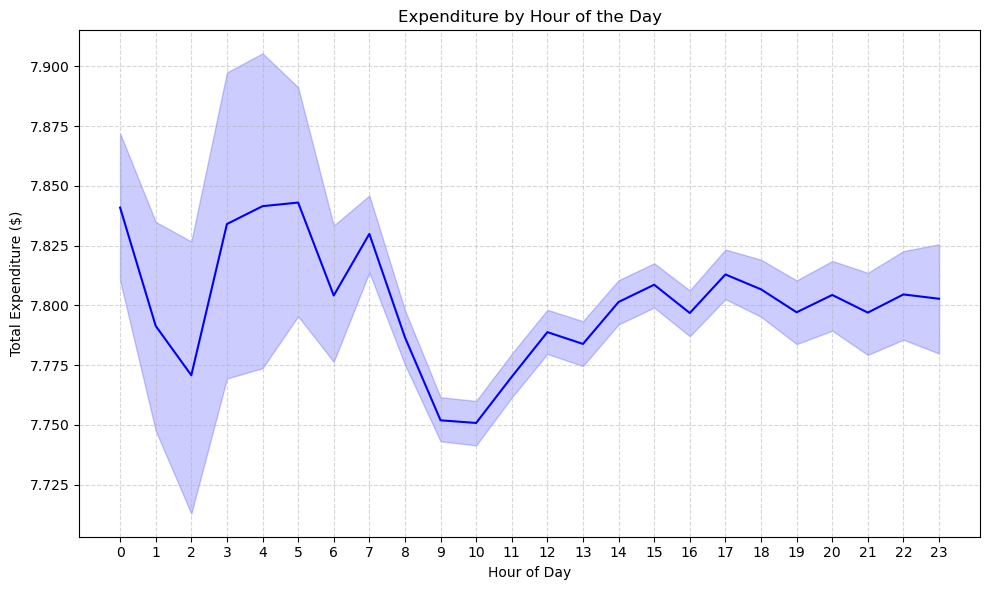

In [6]:
# Set a random seed for reproducibility
np.random.seed(4)

# Create a list holding True/False values to test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_customers_merge)) <= 0.7

# Store 70% of the sample in the dataframe 'big'
big = ords_prods_customers_merge[dev]

# Store 30% of the sample in the dataframe 'small'
small = ords_prods_customers_merge[~dev]

# This creates a new dataframe, df_2, that contains only the “order_hour_of_day” and “prices” columns from your 'small' subset.
df_2 = small[['order_hour_of_day','prices']]

# Create line plot of 'prices' and 'order_hour_of_day' using df_2 dataframe with improved aesthetics
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_2, x='order_hour_of_day', y='prices', color='blue')
plt.title('Expenditure by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Expenditure ($)')
plt.xticks(range(24))  # Set x-axis ticks to display each hour
plt.grid(True, alpha=0.5, linestyle='--')  # Add grid lines for better reference
plt.tight_layout()  # Improve spacing between plot elements

# Save figure to path
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'expenditure_by_hour.png'))

# Display the figure
plt.show()

### *There does not seem to be any significant correlation between expenditure by hour of the day.*

# 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

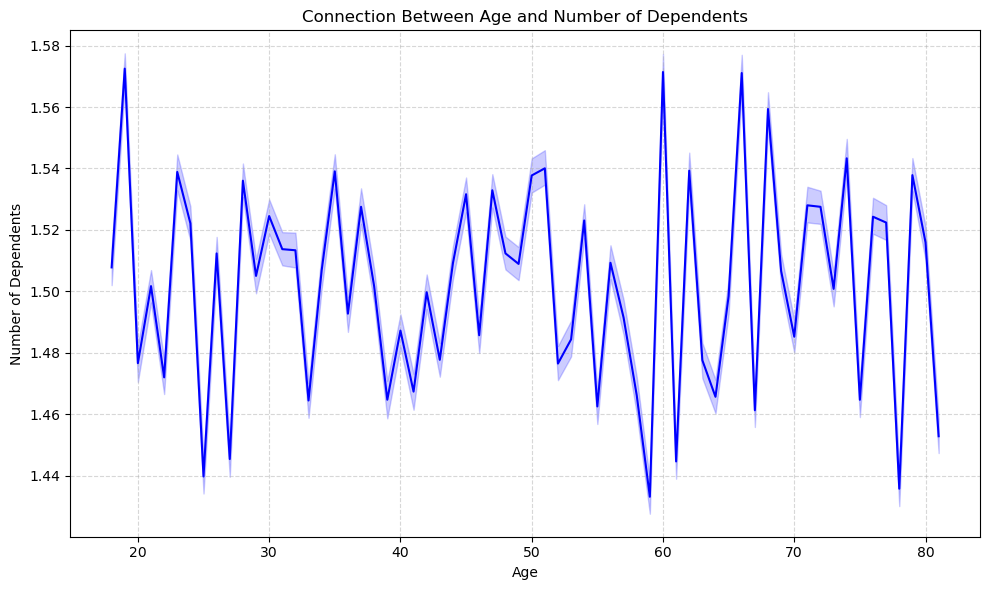

In [7]:
# Set a random seed for reproducibility
np.random.seed(4)

# Create a list holding True/False values to test np.random.rand() <= 0.7
dev = np.random.rand(len(ords_prods_customers_merge)) <= 0.7

# Store 70% of the sample in the dataframe 'big'
big = ords_prods_customers_merge[dev]

# Store 30% of the sample in the dataframe 'small'
small = ords_prods_customers_merge[~dev]

# Create a new dataframe, df_3, that contains only the “age” and “number_of_dependents” columns from your 'small' subset.
df_3 = small[['age','number_of_dependents']]

# Create line chart exploring the connection between age and number of dependents using df_3 dataframe with improved aesthetics
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_3, x='age', y='number_of_dependents', color='blue')  
plt.title('Connection Between Age and Number of Dependents')
plt.xlabel('Age')
plt.ylabel('Number of Dependents')
plt.grid(True, alpha=0.5, linestyle='--')
plt.tight_layout()

# Save figure to path
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_dependents.png'))

# Display the figure
plt.show()

### *There does not seem to be any significant correlation between Age and Number of Dependents.*

# 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

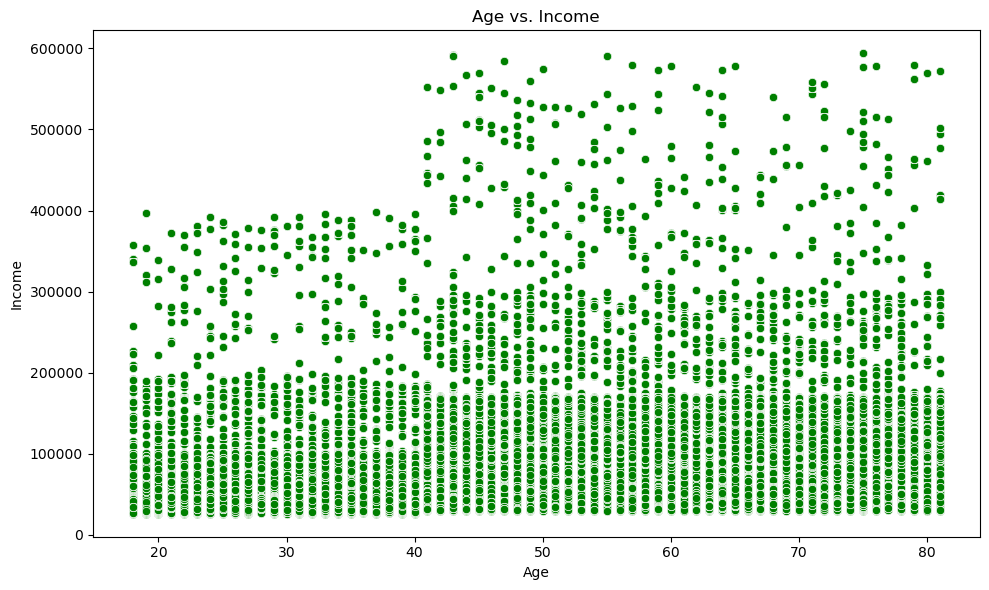

In [8]:
# Create a scatterplot to visualize the relationship between age and income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=small, x='age', y='income', color='green')
plt.title('Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.tight_layout()

# Save figure to path
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_vs_income.png'))

# Display the figure
plt.show()

### *There is a significant correlation of customers after the age of 40 which possess an income higher than 400,000. This does not exist in customers below the age of 40. Income below 400,00 exists in all ages.*